## Movie Exploratory Data Anaylsis 
<i>Donnell Jackson</i>

<div>
    <div style="border:0.2px; border-style:solid; border-color:#1C6EA4; padding: 1em;font-size:15px;border-width:medium;display:inline-block; margin-left:130px;">
     <h1> Questions</h1> 
           <ul>
        <li>Question 1: what movie groups are predominatly produced? 
        <li>Question 2: what movie groups have the highest popularity?
        <li>Question 3: What kind of movies produce the most revenue? 
</ul>
   </div>
    <div style="border:0.2px; border-style:solid; border-color:#1C6EA4; padding: 1em;font-size:15px;border-width:medium;display:inline-block; margin:10px;">
     <h1>Essential Metrics</h1>
     <ul>
   <li> Ratings 
   <li> Revenue 
   <li> Genre
</ul>  
   </div>

   <div style="border:0.2px; border-style:solid; border-color:#1C6EA4; padding: 1em;font-size:15px;border-width:medium;display:inline-block; margin:0px;">
      <h1>Data Analysis Steps</h1>
          <ul>
        <li>Collection & Wrangling  
        <li>Cleaning & Transforming
        <li>Visualization & Analysis
       </ul>
       
   </div>
</div>

<p style="border:0.2px; border-style:solid; border-color:#1C6EA4; padding: 0.5em;font-size:15px; text-align:center; border-width:medium;">
    <b>Collection & Wrangling</b>
</p>

In [ ]:
#background-color:#FAEBD7;

In [2210]:
# importing necessary libraries 
import time 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [356]:
title_baiscs = pd.read_csv("imdb.title.basics.csv.gz")
ratings = pd.read_csv("imdb.title.ratings.csv.gz")
budget = pd.read_csv("tn.movie_budgets.csv.gz")

In [357]:
title_baiscs.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


<center><p style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding:0.5em;font-size:14px;border-width:medium; display:inline-block;">  
Duplicate Check
 </p></center>

In [1197]:
#checking for duplicates
title_baiscs.drop(index =title_baiscs[title_baiscs.duplicated(subset="primary_title")].index, inplace=True)

In [359]:
len(title_baiscs)

136071

In [360]:
title_baiscs.head(1)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"


In [361]:
ratings.head(1)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31


In [362]:
ratings[ratings.duplicated(subset="tconst")]

,tconst,averagerating,numvotes


In [363]:
# get overview of data 
print(len(ratings))
print(len(title_baiscs))

73856
136071


<center><p style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding:0.5em;font-size:14px;border-width:medium; display:inline-block;">  
Joining Tables
 </p></center>

In [364]:
title_baiscs.set_index("tconst", inplace=True) #setting index for tables to be joined with 
ratings.set_index("tconst",inplace=True)

In [365]:
m_df = title_baiscs.join(ratings, on="tconst", how="left")
len(m_df)

136071

In [366]:
m_df.head()# reviewing table join

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [367]:
m_df.rename(columns={"primary_title":"title"}, inplace=True) #renaming column for more intuitve use and matching when joining

In [368]:
budget.head(1)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"


In [369]:
budget.rename(columns={"movie":"title"},inplace=True)# renaming column

In [370]:
budget.set_index("title", inplace=True)# setting index to join 

In [371]:
budget.head(1)# reviewing dataframe 

,id,release_date,production_budget,domestic_gross,worldwide_gross
title,,,,,
Avatar,1,"Dec 18, 2009","$425,000,000","$760,507,625","$2,776,345,279"


In [372]:
m_df.set_index("title", inplace=True)

In [420]:
m_df.head(1)

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
title,,,,,,
Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0


In [374]:
m_df2 = m_df.join(budget, on="title", how="left")#joing budget data frame 

In [421]:
m_df2.head(1)

,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross
0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,NaN,NaN,NaN,NaN,NaN


In [422]:
m_df2[m_df2["worldwide_gross"].notna()].head(1)

,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross
20,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,26.0,"Dec 31, 2012","$45,000,000",$0,"$73,706"


In [402]:
m_df2.reset_index(inplace=True)# resetting index so title column can be used more flexibly and independently 

In [407]:
print(len(m_df))
len(m_df2) - len(m_df2[m_df2.duplicated(subset="title")])

136071


136071

In [410]:
m_df2.drop(m_df2[m_df2.duplicated(subset="title")].index,inplace=True) # removing duplicates 

In [434]:
len(m_df)

136071

<p style="border:0.2px; border-style:solid; border-color:#1C6EA4; padding: 0.5em;font-size:15px; text-align:center;border-width:medium">
    <b>Cleaning & Tranformation</b>
</p>

In [562]:
# creating function that will help highlight data that can be interpreted as outliers 
def outliers(data):
    sorted(data)
    Q1,Q3 = np.percentile(data,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

need to split into 2 frames to get proer description view 
create cash to number function 

<center><p style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding:0.5em;font-size:14px;border-width:medium; display:inline-block;">  
Currency Columns
 </p></center>

In [491]:
# budget table column checks
print(len(m_df2[m_df2["production_budget"].notna()]))
print(len(m_df2[m_df2["domestic_gross"].notna()]))
print(len(m_df2[m_df2["worldwide_gross"].notna()]))

2312
2312
2312
float64
float64
float64


In [485]:
#transforming currency columns from strings with symbols  to floats with decimals 
m_df2["production_budget"] = m_df2["production_budget"].str.replace("$","").str.replace(",","").astype('float')
m_df2["domestic_gross"] = m_df2["domestic_gross"].str.replace("$","").str.replace(",","").astype('float')
m_df2["worldwide_gross"] = m_df2["worldwide_gross"].str.replace("$","").str.replace(",","").astype('float')

In [492]:
m_df2.describe() # getting overview and glance at data metrics which will help highlight areas that need to be addressed 

,start_year,runtime_minutes,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross
count,136071.000000,106598.000000,68827.000000,6.882700e+04,2312.000000,2.312000e+03,2.312000e+03,2.312000e+03
mean,2014.561413,86.186289,6.339238,3.539508e+03,50.517301,3.631816e+07,4.534870e+07,1.092834e+08
std,2.732568,172.111139,1.480194,3.079711e+04,28.622140,4.988586e+07,7.676105e+07,2.125256e+08
min,2010.000000,1.000000,1.000000,5.000000e+00,1.000000,1.400000e+03,0.000000e+00,0.000000e+00
25%,2012.000000,70.000000,5.500000,1.400000e+01,26.000000,5.000000e+06,6.724825e+05,2.450298e+06
50%,2015.000000,86.000000,6.500000,4.800000e+01,50.000000,1.800000e+07,1.834239e+07,3.113681e+07
75%,2017.000000,99.000000,7.400000,2.750000e+02,75.000000,4.500000e+07,5.479033e+07,1.110671e+08
max,2027.000000,51420.000000,10.000000,1.841066e+06,100.000000,4.250000e+08,7.605076e+08,2.776345e+09


In [429]:
m_df2.head()

,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross
0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,NaN,NaN,NaN,NaN,NaN
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,NaN,NaN,NaN,NaN,NaN
2,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,NaN,NaN,NaN,NaN,NaN
3,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0,NaN,NaN,NaN,NaN,NaN
4,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,NaN,NaN,NaN,NaN,NaN


<center><p style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding:0.5em;font-size:14px;border-width:medium; display:inline-block;">  
Runtime
 </p></center>

In [555]:
#creatinf a runtime in hours format to gain further insight into movie runtimes
m_df2["hours"] = round(m_df2["runtime_minutes"]/60,1)

In [559]:
#reviewing hours format agaisnt original minutes format and how it can be interpreted to gain insight 
m_df2[["runtime_minutes","hours"]].describe()

,runtime_minutes,hours
count,106598.000000,106598.000000
mean,86.186289,1.437031
std,172.111139,2.868581
min,1.000000,0.000000
25%,70.000000,1.200000
50%,86.000000,1.400000
75%,99.000000,1.600000
max,51420.000000,857.000000


In [570]:
len(m_df2["hours"][m_df2["hours"].notna()])

106598

In [600]:
m_df2.drop(m_df2[(m_df2["runtime_minutes"]< 45) | (m_df2["runtime_minutes"]>300)].index, inplace=True)

<p style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding: 0.5em;font-size:14px;border-width:medium; text-align:center;">  
    Movie Runtimes Insight
 </p>

In [611]:
run_norm = m_df2["runtime_minutes"][m_df2["runtime_minutes"].notna()]

In [617]:
outliers(m_df2["hours"][m_df2["hours"].notna()])

(0.44999999999999996, 2.45)

In [620]:
m_df2.runtime_minutes.min()

45.0

In [893]:
outliers(run_norm)

(32.5, 140.5)

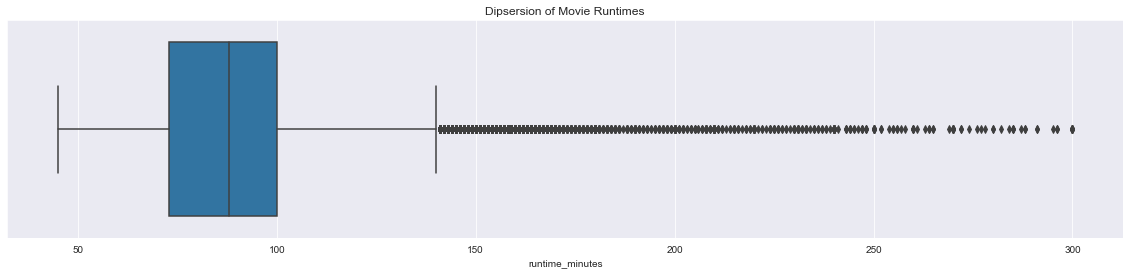

In [768]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,4))
plt.title("Dipsersion of Movie Runtimes")
sns.boxplot(run_norm)

<p style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding: 0.5em;font-size:14px;border-width:medium; text-align:center;">  
Based on our outlier funciton, technically the outliers for runtime are considered to be any movies less than 26.5 minutes and more than 142.5 miutes, 
however this is based on the skew of the current data set.<br>Traditionally speaking, movies lengths are generally a minimum of 50 minutes. Going forward we
will try omitting movies less than 45minuts and more than 180 minutes(3 hours) in runtime.<br>
 </p>

<center><p style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding:0.5em;font-size:14px;border-width:medium; display:inline-block;">  
Revenue
 </p></center>

In [642]:
rev_norm = m_df2[["production_budget","domestic_gross","worldwide_gross"]][m_df2["domestic_gross"].notna()]

In [651]:
rev_norm.describe()

,production_budget,domestic_gross,worldwide_gross
count,2.284000e+03,2.284000e+03,2.284000e+03
mean,3.639080e+07,4.538217e+07,1.094640e+08
std,5.008948e+07,7.702034e+07,2.133728e+08
min,1.400000e+03,0.000000e+00,0.000000e+00
25%,5.000000e+06,6.413428e+05,2.418752e+06
50%,1.800000e+07,1.833764e+07,3.108955e+07
75%,4.500000e+07,5.489707e+07,1.113097e+08
max,4.250000e+08,7.605076e+08,2.776345e+09


<p style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding: 0.5em;font-size:14px;border-width:medium; text-align:center;">  
Movie Runtime Insight
 </p>

In [730]:
m_df2[m_df2["worldwide_gross"] == 0].head()

,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,hours
69,Anderson's Cross,Anderson's Cross,2010,98.0,"Comedy,Drama,Romance",5.5,106.0,65.0,"Dec 31, 2010",300000.0,0.0,0.0,1.6
158,House at the End of the Drive,House at the End of the Drive,2014,91.0,"Horror,Thriller",6.5,331.0,28.0,"Dec 31, 2014",1400000.0,0.0,0.0,1.5
201,Barry Munday,Barry Munday,2010,95.0,"Comedy,Drama,Romance",5.9,3846.0,61.0,"Oct 1, 2010",3000000.0,0.0,0.0,1.6
460,The Dead Undead,The Dead Undead,2010,89.0,"Action,Horror,Sci-Fi",3.0,791.0,7.0,"Dec 31, 2010",1100000.0,0.0,0.0,1.5
476,Freaky Deaky,Freaky Deaky,2012,90.0,"Comedy,Crime,Thriller",6.1,6088.0,94.0,"Dec 31, 2011",6000000.0,0.0,0.0,1.5


Text(0.5, 0, 'Worldwide Gross in Millions')

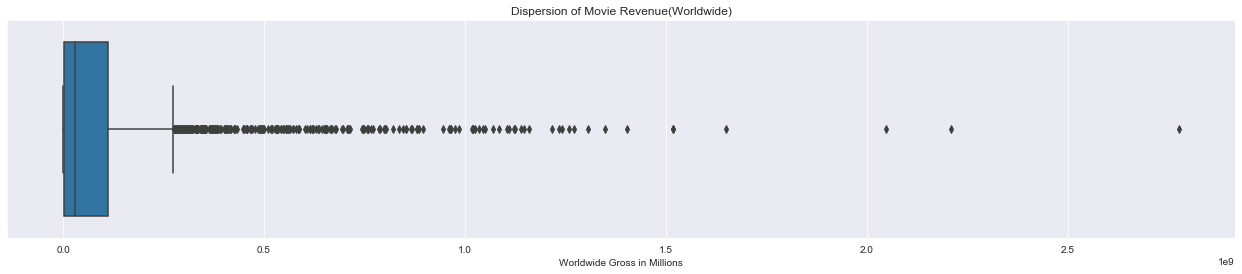

In [767]:
# a lot of revenues at 0 
plt.figure(figsize=(22,4))
plt.title("Dispersion of Movie Revenue(Worldwide)")
sns.boxplot(rev_norm["worldwide_gross"]);
plt.xlabel("Worldwide Gross in Millions")

In [725]:
rev_norm.["wor"]

production_budget    1400.0
domestic_gross          0.0
worldwide_gross         0.0
dtype: float64

In [723]:
m_df2[m_df2["worldwide_gross"] < 0]

,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,hours


<p style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding: 0.5em;font-size:14px;border-width:medium; text-align:center;">  
shows majority of revenue values are insuficient for an alysis <br>
    Need to adjust x ticks to show in millions or something revenues showing that there is no revenue, however have production 
also not enough columns matched for revenue. we will nto continue on our anaylsis with revenues being a prinary factor 
but using other columsn such as rating and votes 
 </p>

2284


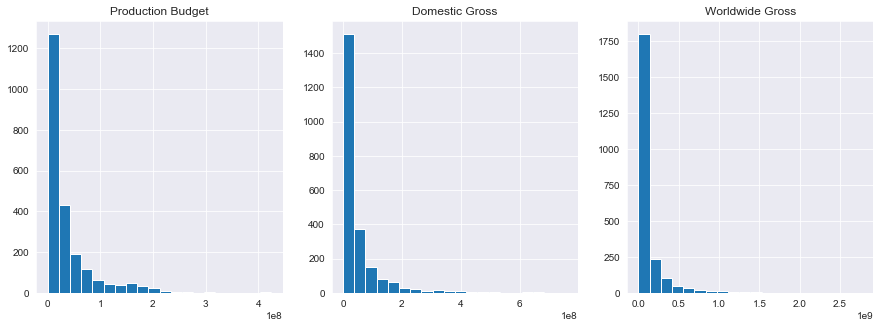

In [1195]:
f,axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

ax0 = axes[0]
ax1= axes[1]
ax2 = axes[2]
ax0.set_title("Production Budget")
ax1.set_title("Domestic Gross")
ax2.set_title("Worldwide Gross")

rev_norm["production_budget"].hist(bins=20, ax=ax0)
rev_norm["domestic_gross"].hist(bins=20, ax=ax1)
rev_norm["worldwide_gross"].hist(bins=20,ax=ax2)
print(len(rev_norm))

<center><p style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding:0.5em;font-size:14px;border-width:medium; display:inline-block;">  
Movie Genre
 </p></center>

In [1021]:
# some movies have missing genres, and other missing data. While others only have missing genres. we will try to work around those only with missing genres so they can perhaps be used in later anaylisis 
print(len( m_df2[(m_df2["genres"].isna()) & (m_df2["runtime_minutes"].isna())]))
print(len(m_df2[(m_df2["genres"].isna()) & (m_df2["averagerating"].isna())]))

0
0


In [963]:
m_df2["genres"].fillna("x", inplace=True)

In [1014]:
m_df2["prime_genre"] = m_df2["genres"].map(lambda x: x.split(","))
m_df2["prime_genre"] = m_df2["prime_genre"].map(lambda x: x[0])

In [1009]:
m_df2["prime_genre"] = [i for i in m_df2["genres"]]

In [1023]:
m_df2["prime_genre"].replace("x",np.nan, inplace=True)

In [1024]:
m_df2[m_df2["prime_genre"] =="x"]

,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,hours,prime_genre


In [2267]:
for i in enumerate(m_df2["prime_genre"].unique()):
    print(i, end=",")

(0, 'Action'),(1, 'Biography'),(2, 'Drama'),(3, 'Comedy'),(4, 'Horror'),(5, 'Adventure'),(6, 'Documentary'),(7, 'History'),(8, 'Animation'),(9, nan),(10, 'Crime'),(11, 'Sci-Fi'),(12, 'Thriller'),(13, 'Fantasy'),(14, 'Mystery'),(15, 'Musical'),(16, 'Family'),(17, 'Western'),(18, 'Romance'),(19, 'Sport'),(20, 'Adult'),(21, 'Music'),(22, 'News'),(23, 'Reality-TV'),(24, 'War'),(25, 'Game-Show'),

In [2266]:
m_df2["prime_genre"].unique()

array(['Action', 'Biography', 'Drama', 'Comedy', 'Horror', 'Adventure',
       'Documentary', 'History', 'Animation', nan, 'Crime', 'Sci-Fi',
       'Thriller', 'Fantasy', 'Mystery', 'Musical', 'Family', 'Western',
       'Romance', 'Sport', 'Adult', 'Music', 'News', 'Reality-TV', 'War',
       'Game-Show'], dtype=object)

In [ ]:
# non movie genres 
print(m_df2["prime_genre"].unique()[25])
print(m_df2["prime_genre"].unique()[23])
print(m_df2["prime_genre"].unique()[22])
print(m_df2["prime_genre"].unique()[21])
print(m_df2["prime_genre"].unique()[20])

In [2287]:
#dropping movie genres
gen_drop = [25,23,22,21,20]
for i in  gen_drop:
    drop_list = m_df2[m_df2["prime_genre"]==m_df2["prime_genre"].unique()[i]]
    m_df2.drop(drop_list.index, inplace=True)

<p style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding: 0.5em;font-size:14px;border-width:medium; text-align:center;">  
Movie Genre Insight
 </p>

In [1056]:
# top 10/most common Movie Genres for 2010-2018
m_df2["prime_genre"].value_counts()[0:10]

Documentary    36040
Drama          28128
Comedy         20219
Action          9427
Biography       6593
Horror          6019
Adventure       4223
Crime           3480
Thriller        2653
Animation       1681
Name: prime_genre, dtype: int64

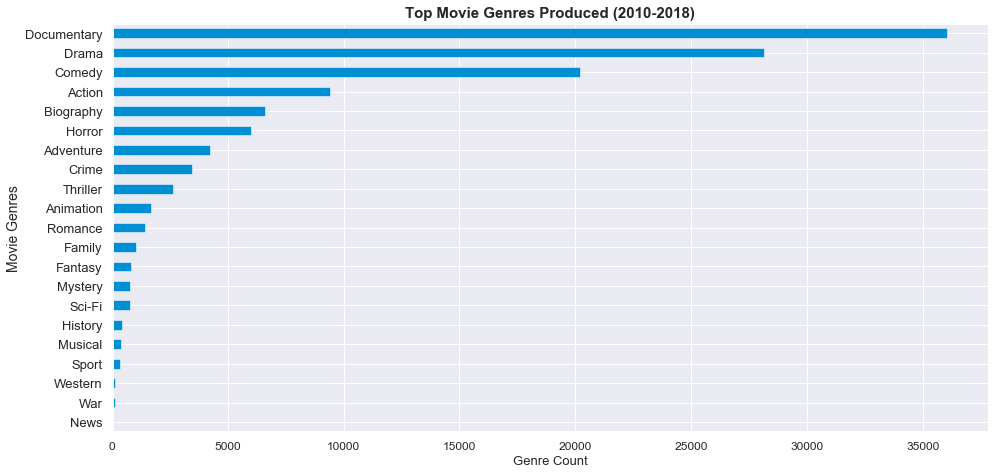

In [2288]:
sns.set_style("darkgrid") # setting chart style 

plt.figure(figsize=(14,7)) #creating plot figure 
m_df2.groupby("prime_genre").count()["title"].sort_values(ascending=True).plot(kind="barh") #plotting grouped dataframe
plt.title("Top Movie Genres Produced (2010-2018)",fontdict={"size":15},fontweight="bold") #defining title and fotn styles
plt.xlabel("Genre Count",fontdict={"size":13}) #defining x-axis label
plt.ylabel("Movie Genres",fontdict={"size":14}) #defining y-axis label
plt.xticks(fontsize=12)
plt.yticks(fontsize=13);

<div style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding: 0.5em;font-size:14px;border-width:medium;">
<p>  
According to our data the top ranking movie genre is respect to qaunty is Documentary(36040).<br> 
The remaing top 5 quanittiy of genres are the following that is: <br></p>
    <ul>
        <li>Drama (28128)
        <li>Comedy (20219)
        <li>Action (9427)
        <li>Biography (6593)
    </ul>
<p>
Based on our data the genre quanitites far trail behind the or top 3.
</div>

<p style="border:0.2px; border-style:solid; border-color:#1C6EA4; padding: 0.5em;font-size:15px; text-align:center;border-width:medium">
    <b>Clean</b>
</p>

<center><p style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding:0.5em;font-size:14px;border-width:medium; display:inline-block;">  
Average Ratings
 </p></center>

In [2215]:
# copying dataframe and renaming as a safegaurd for previous steps 
df_movie = m_df2.copy()

In [2221]:
df_movie.rename(columns={"start_year":"year"}, inplace=True) #renaming colum for more intuitive use 

In [1031]:
df_movie.head()

,title,original_title,year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,hours,prime_genre
0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,NaN,NaN,NaN,NaN,NaN,2.9,Action
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,NaN,NaN,NaN,NaN,NaN,1.9,Biography
2,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,NaN,NaN,NaN,NaN,NaN,2.0,Drama
3,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0,NaN,NaN,NaN,NaN,NaN,NaN,Comedy
4,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,NaN,NaN,NaN,NaN,NaN,1.3,Comedy


In [1032]:
df_movie.year.value_counts()# reviewing move time-frames by year 

2017    15092
2016    14950
2018    14656
2015    14175
2014    13908
2013    13266
2012    12670
2011    12017
2010    11196
2019     7603
2020      886
2021       76
2022       21
2023        4
2025        1
2024        1
2027        1
Name: year, dtype: int64

In [1034]:
df_movie[(df_movie["year"]>= 2010) & (df_movie["year"]<=2018)].count() #reviewing overall data for timeframe of movies we want to use 

title                121930
original_title       121916
year                 121930
runtime_minutes       96944
genres               121930
averagerating         66435
numvotes              66435
id                     2176
release_date           2176
production_budget      2176
domestic_gross         2176
worldwide_gross        2176
hours                 96944
prime_genre          117391
dtype: int64

In [1036]:
len(df_movie[(df_movie["year"]<2010) | (df_movie["year"]>2018)]) # ammount of rows we will be omitting 

8593

In [1037]:
df_movie.drop(df_movie[(df_movie["year"]<2010) | (df_movie["year"]>2018)].index, inplace=True) #dropping rows 

<p style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding: 0.5em;font-size:14px;border-width:medium; text-align:center;">  
Movie Count Insight
 </p>

In [ ]:
y_point = []
for i in df_movie.groupby("year")["title"].count():
    y_point.append(i)
x_point = list(range(len(yp)))
print(x_point)
print(y_point)

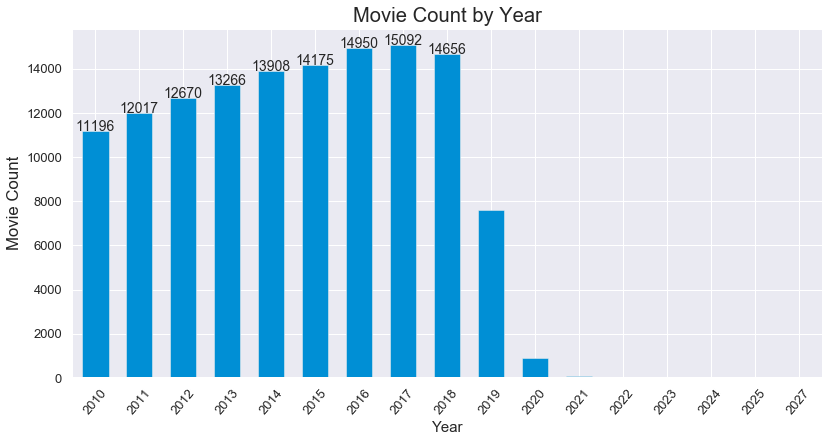

In [2290]:
fig, ax = plt.subplots(figsize=(12,6))
plt.style.use('fivethirtyeight')

df_movie.groupby("year")["title"].count().plot(kind="bar", width=0.6)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Movie Count")
plt.title("Movie Count by Year")
plt.xticks(rotation=50);
for i in xp:
    ax.annotate(yp[i],(xp[i],yp[i]), ha="center")

In [854]:
df_movie.groupby("year")["title"].count()

year
2010    11538
2011    12405
2012    13149
2013    13882
2014    14526
2015    14921
2016    15750
2017    15945
2018    15230
Name: title, dtype: int64

<p style="border:0.2px; border-style:solid; border-color:#1C6EA4; padding: 0.5em;font-size:15px; text-align:center;border-width:medium">
    <b>Analysis & Visualization</b>
</p>

<center><p style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding:0.5em;font-size:14px;border-width:medium; display:inline-block;">  
Average Ratings
 </p></center>

In [2252]:
df_movie["averagerating"].describe()

count    68402.000000
mean         6.332012
std          1.478529
min          1.000000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: averagerating, dtype: float64

highlight all tops by diving by top 25-30% create color map 

In [2255]:
df_movie[df_movie["prime_genre"]=="Game-Show"]

,title,original_title,year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,hours,prime_genre
46913,Wait Wait Don't Tell Me Live!,Wait Wait Don't Tell Me Live!,2013,130.0,Game-Show,9.0,7.0,NaN,NaN,NaN,NaN,NaN,2.2,Game-Show
74209,Level 48,Level 48,2014,NaN,Game-Show,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Game-Show


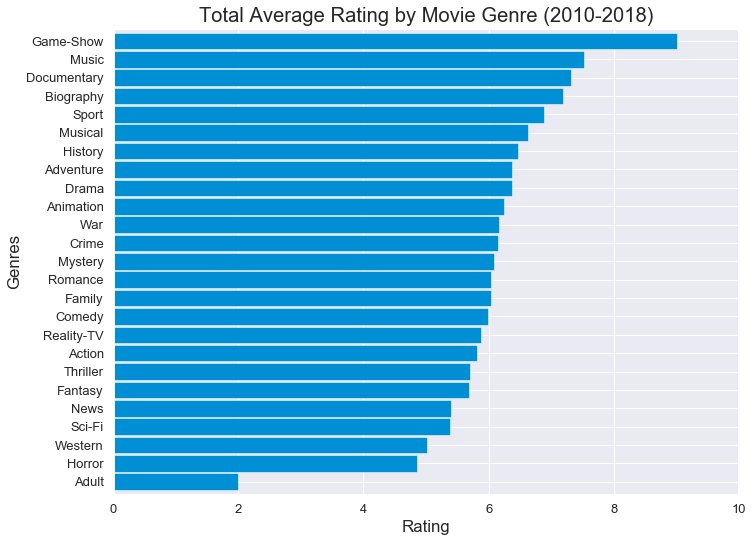

In [2231]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10,8))
df_movie.groupby("prime_genre")["averagerating"].mean().sort_values().plot(kind="barh", width=.9)
plt.title("Total Average Rating by Movie Genre (2010-2018)")
plt.ylabel("Genres")
plt.xlabel("Rating")
xticks = np.linspace(0,10,6)
plt.xticks(xticks)
plt.show()

In [1952]:
frame_prime = df_movie.groupby(["prime_genre","year"])["averagerating"].mean().to_frame() # creating dataframe for plotting

In [1953]:
frame_prime.reset_index(inplace=True) # resetting default index so all columns are intuitively accesable 

In [1957]:
# creating list of years for indicing and looping 
year_list = frame_prime.year.unique().tolist()
year_list.append(0)
year_list = sorted(year_list)
year_list

[0, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [2336]:
frame_prime.head()

,prime_genre,year,averagerating
0,Action,2010,5.676254
1,Action,2011,5.725224
2,Action,2012,5.877795
3,Action,2013,5.731832
4,Action,2014,5.903112


In [2369]:
year_list[1]

2010

In [2371]:
frame_prime[frame_prime["year"] == 2010].sort_values("averagerating", ascending=False)[0:5]["averagerating"].round(2)

59     7.27
32     7.13
176    7.09
115    7.07
23     6.63
Name: averagerating, dtype: float64

In [2435]:
frame_prime["year"] = frame_prime["year"].astype(float)

In [2436]:
frame_prime[(frame_prime["year"] == 2010) & (frame_prime["year"].notna())].sort_values("averagerating", ascending=False)[0:5].round(1)

,prime_genre,year,averagerating
59,Documentary,2010.0,7.3
32,Biography,2010.0,7.1
176,Sport,2010.0,7.1
115,Music,2010.0,7.1
23,Animation,2010.0,6.6


In [2473]:
year_list

[0, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [ ]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(29,15))
col = ["mediumseagreen","steelblue","steelblue","steelblue","steelblue"]

for i in range(1,10):
    row = (i-1)//3
    col = i%3-1
    ax = axes[row][col]
    sns.barplot(x="averagerating", y="prime_genre",data=frame_prime[frame_prime["year"] == year_list[i]].sort_values("averagerating", ascending=False)[0:5].round(1), orient="h", palette=col, ax=ax)

for v, r in enumerate(frame_prime[frame_prime["year"] == year_list[i]].sort_values("averagerating", ascending=False)[0:5]["averagerating"].round(1)):
        ax.text(r/2, v-.124, r, color="white", fontweight="bold", ha="center")

In [2465]:
for i in range(1,10):
    row = (i-3)//3
    col = i%3-1
    ax = axes[row][col]
    for v, r in enumerate(frame_prime[frame_prime["year"] == year_list[i]].sort_values("averagerating", ascending=False)[0:5]["averagerating"].round(1)):
        ax.text(r/2, v-.124, r, color="white", fontweight="bold", ha="center")

In [ ]:
plt.style.use('seaborn')

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(29,15))

for i in range(1,10):
    row = (i-1)//3
    col = i%3-1
    ax = axes[row][col]
    x = frame_prime[frame_prime["year"] == year_list[i]].sort_values("averagerating", ascending=False)[0:5].round(1)
    sns.barplot(x=x["prime_genre"], y=x["averagerating"], ax=axes)
    ax.set_title("Top 5 Genre Ratings for {}".format(year_list[i]))
    ax.set_xticks(list(range(0,10)))
    ax.set_ylabel(None)
    ax.legend().remove()
    
for i in range(1,10):
    row = (i-3)//3
    col = i%3-1
    ax = axes[row][col]
    for v, r in enumerate(frame_prime[frame_prime["year"] == year_list[i]].sort_values("averagerating", ascending=False)[0:5]["averagerating"].round(1)):
        ax.text(r/2, v-.124, r, color="white", fontweight="bold", ha="center")

In [2491]:
frame_prime[frame_prime["year"] == year_list[i]].sort_values("averagerating", ascending=False)[0:5]

,prime_genre,year,averagerating
123,Music,2018.0,7.890909
157,Reality-TV,2018.0,7.800000
67,Documentary,2018.0,7.440434
40,Biography,2018.0,6.990865
184,Sport,2018.0,6.800000


In [2498]:
frame_prime[frame_prime["year"] == year_list[i]].sort_values("averagerating", ascending=False)[0:5]["averagerating"].round(2)

123    7.89
157    7.80
67     7.44
40     6.99
184    6.80
Name: averagerating, dtype: float64

In [2501]:
 for v, r in enumerate(frame_prime[frame_prime["year"] == year_list[i]].sort_values("averagerating", ascending=False)[0:5]["averagerating"].round(2)):
        print(r)

7.89
7.8
7.44
6.99
6.8


In [2533]:
frame_prime[(frame_prime["year"] == 2010) & (frame_prime["averagerating"].notna())].sort_values("averagerating", ascending=False)[0:5]

,prime_genre,year,averagerating
59,Documentary,2010.0,7.265221
32,Biography,2010.0,7.125497
176,Sport,2010.0,7.090909
115,Music,2010.0,7.068182
23,Animation,2010.0,6.634146


In [2542]:
frame_prime.sort_values(["year","averagerating"], ascending=False, inplace=True)

In [2547]:
frame_prime[frame_prime["year"]==2010][0:5]

,prime_genre,year,averagerating
59,Documentary,2010.0,7.265221
32,Biography,2010.0,7.125497
176,Sport,2010.0,7.090909
115,Music,2010.0,7.068182
23,Animation,2010.0,6.634146


In [2561]:
year_list

[0, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [2565]:
frame_prime[frame_prime["year"] == year_list[1]][0:5]["averagerating"]

59     7.265221
32     7.125497
176    7.090909
115    7.068182
23     6.634146
Name: averagerating, dtype: float64

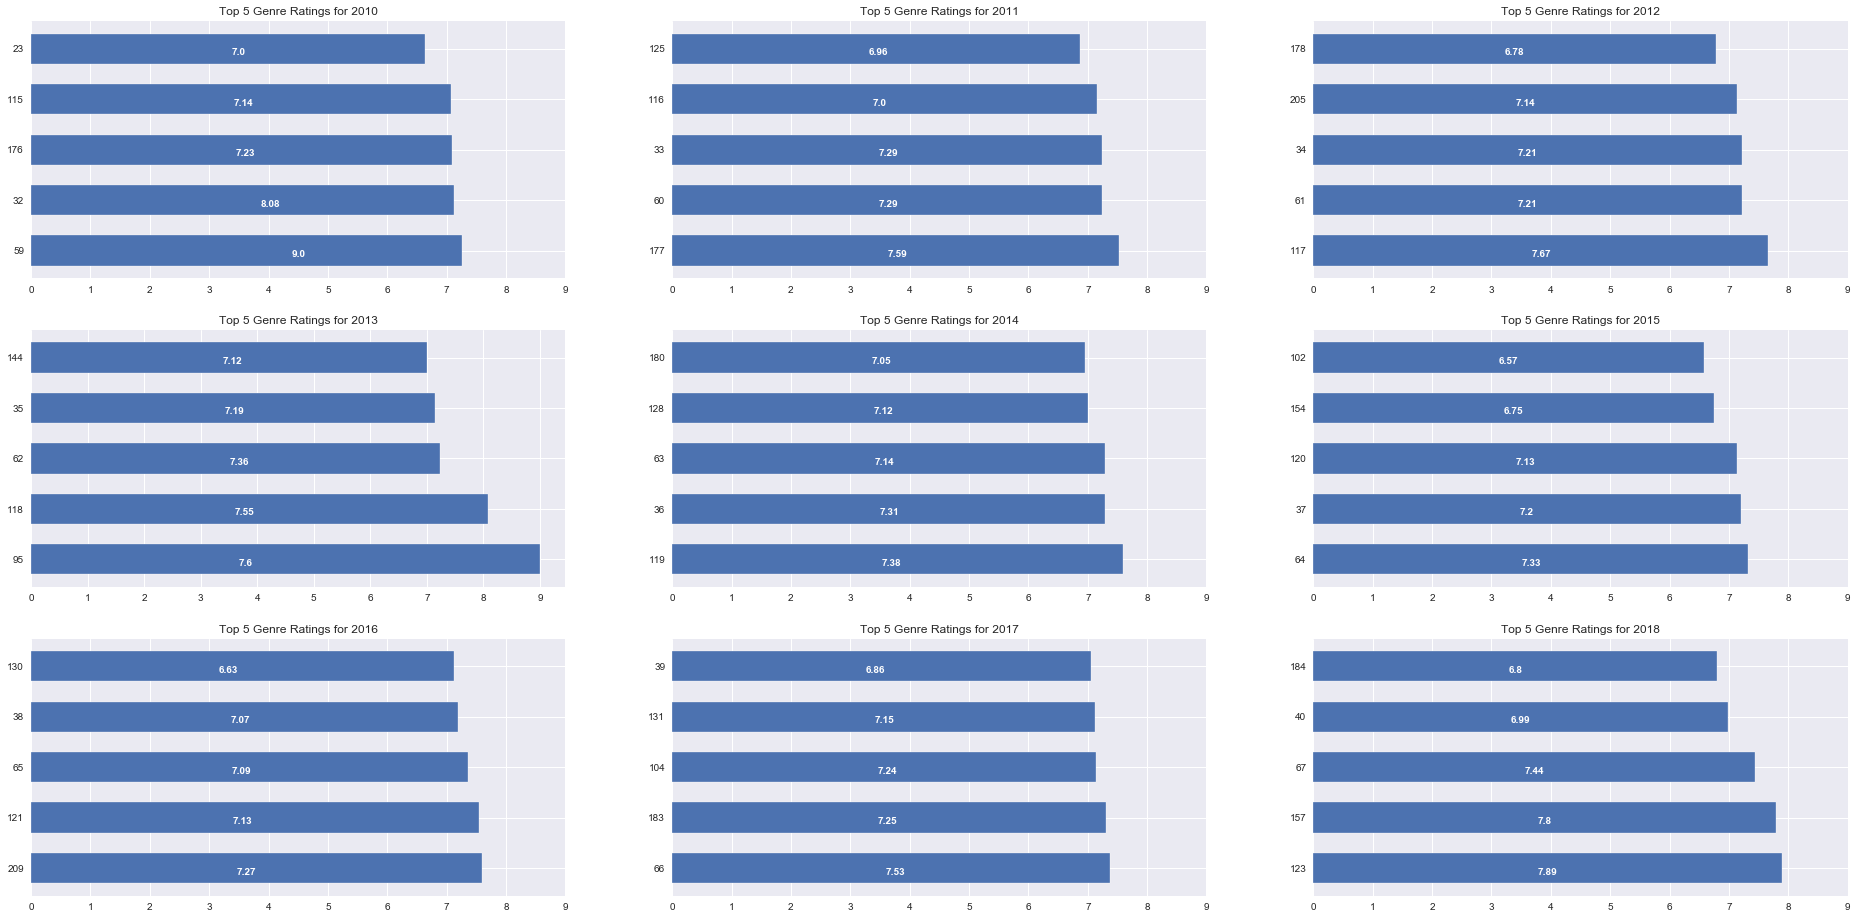

In [2566]:
plt.style.use('seaborn')

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(29,15))

for i in range(1,10):
    row = (i-1)//3
    col = i%3-1
    ax = axes[row][col]
    frame_prime[frame_prime["year"] == year_list[i]][0:5]["averagerating"].plot(kind="barh", x="prime_genre",y="averagerating", ax=ax, width=.6)
    ax.set_title("Top 5 Genre Ratings for {}".format(year_list[i]))
    ax.set_xticks(list(range(0,10)))
    ax.set_ylabel(None)
    ax.legend().remove()
    
for i in range(1,10):
    row = (i-3)//3
    col = i%3-1
    ax = axes[row][col]
    for v, r in enumerate(frame_prime[frame_prime["year"] == year_list[i]][0:5]["averagerating"].round(2)):
        ax.text(r/2, v-.124, r, color="white", fontweight="bold", ha="center")
        

<div style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding: 0.5em;font-size:14px;border-width:medium;">
<p>  

</div>

In [2292]:
df_movie.head()

,title,original_title,year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,hours,prime_genre
0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,NaN,NaN,NaN,NaN,NaN,2.9,Action
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,NaN,NaN,NaN,NaN,NaN,1.9,Biography
2,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,NaN,NaN,NaN,NaN,NaN,2.0,Drama
3,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0,NaN,NaN,NaN,NaN,NaN,NaN,Comedy
4,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,NaN,NaN,NaN,NaN,NaN,1.3,Comedy


In [ ]:
df_movie.groupby()